In [4]:
""


from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
#loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/data_for_R/Masked_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

device = 'cuda:0'
all_graphs_weights_df.shape=(38428, 4921)


((385, 4921), (38428,))

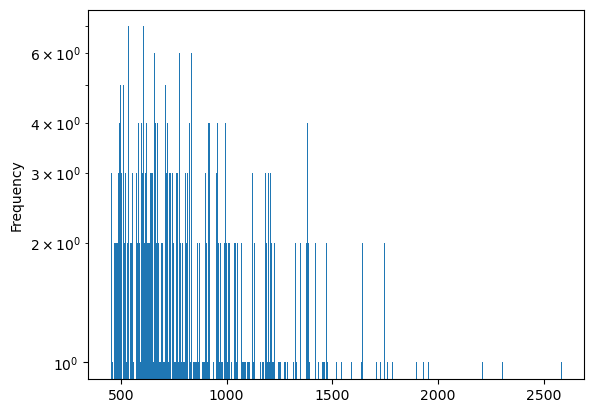

In [5]:
edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 99)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=500)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

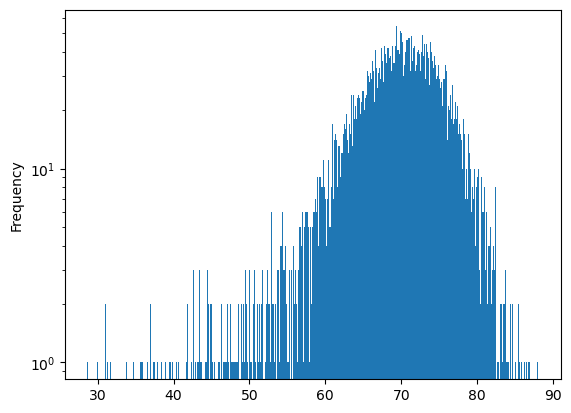

In [6]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [7]:
#loader_path = "./results/dataloaders/MASKED_loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#train_labels = []
#for graph in tqdm.tqdm(loader_train.dataset):
#    train_labels.append(graph.y.cpu().item())
#train_labels.__len__()

train_labels = pd.read_csv("./results/data/data_for_R/Mask_train_labels.csv").drop('Unnamed: 0', axis=1)['0']

filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = list(train_labels)

filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

,417,1811,2575,2959,3954,4237,4239,4240,4242,4243,...,36120,36128,36133,36136,36826,37482,38212,38261,38262,Label
0,0.031795,0.026460,0.286803,0.703749,0.049078,0.196854,0.581002,0.104833,0.390940,0.522698,...,0.023837,0.409263,0.516439,0.031586,0.025539,0.237799,0.223937,0.168699,0.125315,Control
1,0.444939,0.504451,0.290118,0.016609,0.377641,0.022678,0.013871,0.013940,0.014025,0.479415,...,0.014074,0.017037,0.021345,0.014189,0.188538,0.014213,0.014489,0.117035,0.239693,PKU
2,0.015893,0.013868,0.397468,0.017448,0.506255,0.019851,0.015365,0.013936,0.014624,0.466150,...,0.013699,0.649766,0.016658,0.014752,0.486464,0.014290,0.014628,0.169650,0.187577,Control
3,0.014116,0.446239,0.182305,0.016211,0.466333,0.027587,0.020388,0.022738,0.017021,0.369167,...,0.014197,0.557641,0.016419,0.521515,0.470900,0.014361,0.014595,0.114702,0.363948,PKU
4,0.031279,0.055073,0.257072,0.013607,0.332245,0.283948,0.052595,0.639588,0.418213,0.420374,...,0.018299,0.331048,0.438352,0.018886,0.025536,0.236460,0.230775,0.206386,0.025188,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.014560,0.426556,0.089285,0.017437,0.375065,0.017462,0.014413,0.013749,0.012685,0.568741,...,0.014325,0.019164,0.017592,0.014474,0.531651,0.014432,0.014795,0.483136,0.496252,PKU
4917,0.036056,0.016502,0.290353,0.581917,0.020703,0.196612,0.039560,0.046175,0.358623,0.021910,...,0.104211,0.354044,0.485229,0.144468,0.098338,0.252864,0.234434,0.031987,0.130308,Control
4918,0.017274,0.511591,0.245498,0.016556,0.409896,0.026556,0.024899,0.028117,0.027774,0.364795,...,0.014202,0.528232,0.018855,0.015666,0.239677,0.014498,0.014584,0.047714,0.438194,PKU
4919,0.423704,0.472736,0.321590,0.021154,0.395963,0.046159,0.017597,0.014528,0.014127,0.377220,...,0.014636,0.442788,0.019391,0.392723,0.208890,0.014836,0.015215,0.068043,0.377992,PKU


In [8]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [9]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]

edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})



edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]



edges_node_names_explainer_subgraphs.to_csv("./results/data/data_for_R/Masked_edges_node_names_explainer_subgraphs.csv")
pd.concat([edges_df, all_graphs_weights_df], axis=1).to_parquet("./results/data/data_for_R/Masked_ALL_edges_node_names_explainer_subgraphs.parquet.gzip", compression='gzip')